<a href="https://colab.research.google.com/github/Eliah5/ATM/blob/main/my_First_colabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count     569.000000   569.000000    569.000000      569.000000   569.000000   
mean   100984.233538    19.520965     19.289649       91.969033   654.889104   
std       162.410474    94.909505      4.301036       24.298981   351.914129   
min    100701.000000     6.981000      9.710000       43.790000   143.500000   
25%    100845.000000    11.710000     16.170000       75.170000   420.300000   
50%    100984.360424    13.380000     18.840000       86.240000   551.100000   
75%    101123.000000    15.850000     21.800000      104.100000   782.700000   
max    101269.000000  2000.570000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  Concavity mean  concave points_mean  \
count       569.000000        569.000000       569.00000           569.000000   
mean          0.096360          0.104341         0.08875             0.049092   
std           0.014064          0.05

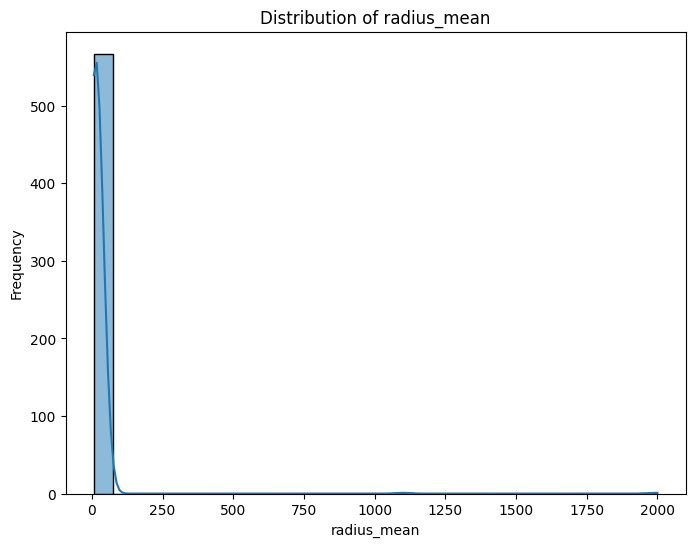

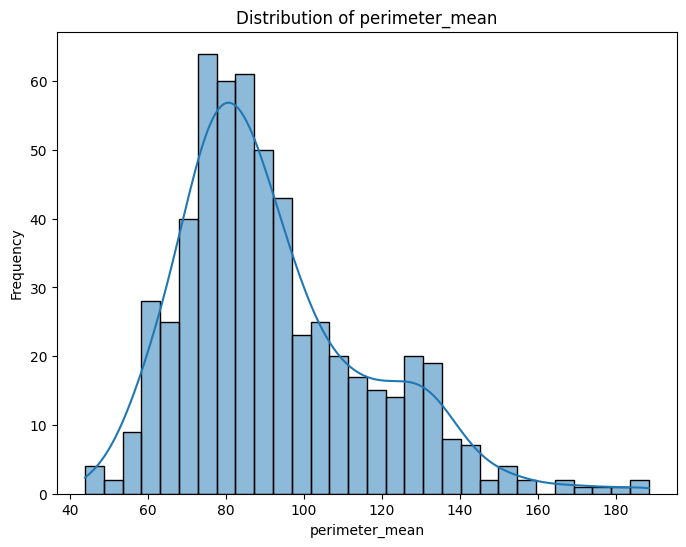

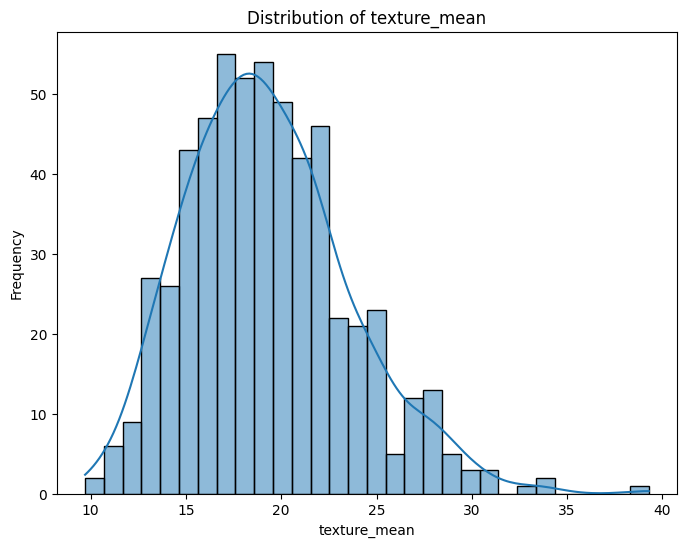

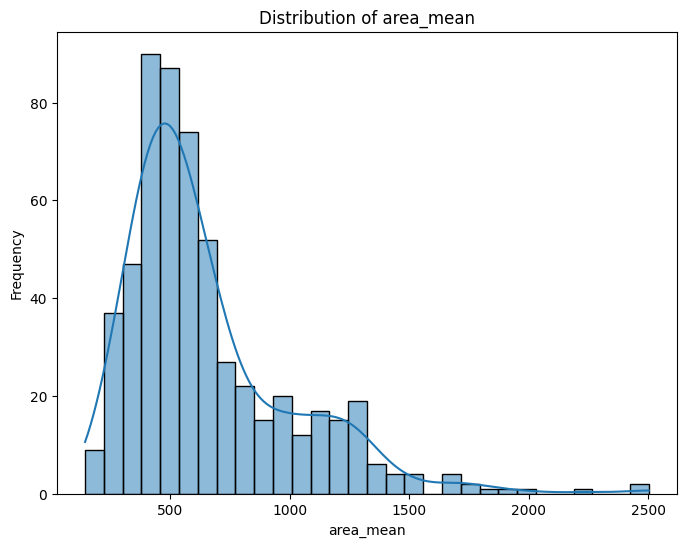

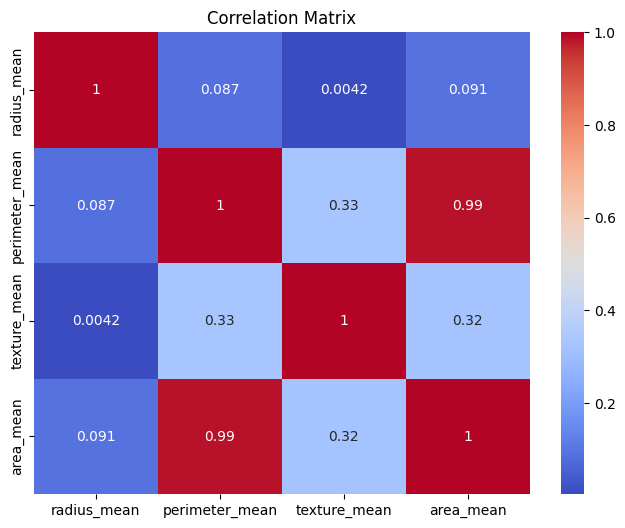

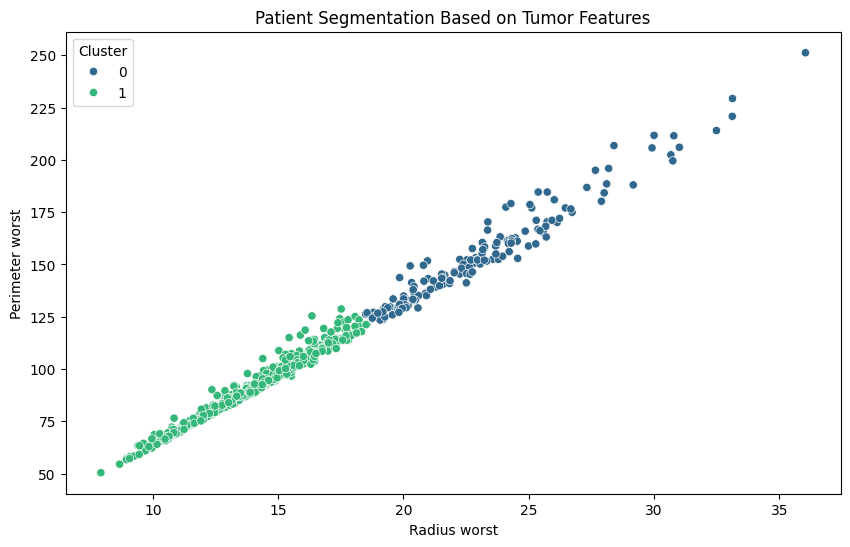

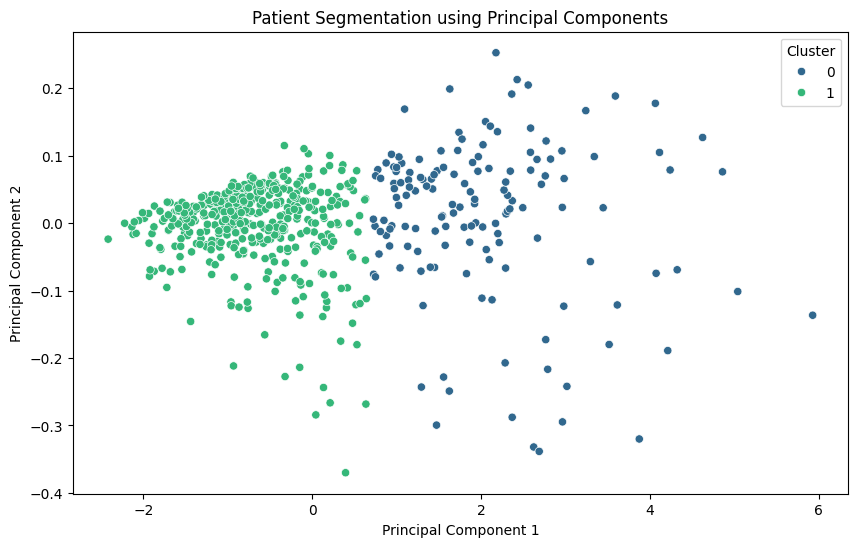

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **1. Data Loading and Cleaning**
data = pd.read_csv('/content/cancer_data.csv')  # Fixed path

# Handle missing values correctly
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Remove duplicates
data.drop_duplicates(inplace=True)

# **2. Exploratory Data Analysis**
# Summary statistics
print(data.describe())

# Distribution of selected features
features_to_plot = ['radius_mean', 'perimeter_mean', 'texture_mean', 'area_mean']
for feature in features_to_plot:
    if feature in data.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Correlation matrix
corr_features = [f for f in features_to_plot if f in data.columns]
if len(corr_features) > 1:
    correlation_matrix = data[corr_features].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# **3. Clustering (Patient Segmentation)**
if 'radius_worst' in data.columns and 'perimeter_worst' in data.columns:
    features = data[['radius_worst', 'perimeter_worst']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

 # Fixed `n_init`
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(scaled_features)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='radius_worst', y='perimeter_worst', hue='Cluster', palette='viridis')
    plt.title('Patient Segmentation Based on Tumor Features')
    plt.xlabel('Radius worst')
    plt.ylabel('Perimeter worst')
    plt.legend(title='Cluster')
    plt.show()

# **4. Dimensionality Reduction (PCA - Optional)**
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
data['PC1'], data['PC2'] = principal_components[:, 0], principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Patient Segmentation using Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# **5. Save Cleaned Data**
data.to_csv('cancer_data_cleaned.csv', index=False)
